In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import backend.ann as nn 
import backend.layers as lyr
import backend.activations as activ
import backend.optimizers as optim
import backend.losses as losses
import backend.initializers as init

In [2]:
train2 = pd.read_csv('train2.txt', delimiter='\t', names=['x','y'])
train2.reset_index(drop=True, inplace=True)
train2= train2.to_numpy()
print(train2.shape)
train2x = train2[:,0,np.newaxis]
train2y = train2[:,1,np.newaxis]
print(train2x.shape, train2y.shape)

test2 = pd.read_csv('test2.txt', delimiter='\t', names=['x','y'])
test2.reset_index(drop=True, inplace=True)
test2 = test2.to_numpy()
print(test2.shape)
test2x = test2[:,0,np.newaxis]
test2y = test2[:,1,np.newaxis]
print(test2x.shape, test2y.shape)

#normalize
train2xNor = (train2x - np.mean(train2x))/np.std(train2x)
train2yNor = (train2y - np.mean(train2y))/np.std(train2y)
test2xNor = (test2x - np.mean(train2x))/np.std(train2x)
test2yNor = (test2y - np.mean(train2y))/np.std(train2y)

(229, 2)
(229, 1) (229, 1)
(92, 2)
(92, 1) (92, 1)


In [13]:
model = nn.ANNRegressor()
layers = []
HIDDEN = 16
layers.append(lyr.Dense(train2xNor.shape[1], HIDDEN, activation=activ.Tanh(), 
                        kernel_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005),
                         bias_initializer=init.Zeros()))
layers.append(lyr.Dense(HIDDEN, 1, activation=activ.Linear(),
                        kernel_initializer=init.RandomUniform(minval=-0.0005, maxval=0.0005),
                        bias_initializer=init.Zeros()))

model(layers)

opt = optim.Momentum(lr=0.01, momentum=0.1)#lr=0.0004 worked for adam
loss = losses.MSE()
metrics = ['train_loss']

model.compile(optimizer=opt, loss=loss, metrics=metrics)
print(model)


Layer 0: Input Dim: 1, Number of Neurons: 16 Activation: tanh
Layer 1: Input Dim: 16, Number of Neurons: 1 Activation: linear



In [14]:
hist = model.train(train2xNor, train2yNor, epochs=50000, batch_size=1, verbose=True, stopping_loss=0.1, shuffle=True)

----------------epoch 1----------------
train_loss:1.0000662952349224
----------------epoch 2----------------
train_loss:1.0016868162583983
----------------epoch 3----------------
train_loss:1.0000498296366112
----------------epoch 4----------------
train_loss:1.0002089705061514
----------------epoch 5----------------
train_loss:1.0016499552501437
----------------epoch 6----------------
train_loss:1.0001116845310745
----------------epoch 7----------------
train_loss:0.9999977165418226
----------------epoch 8----------------
train_loss:1.0010450810428846
----------------epoch 9----------------
train_loss:1.0000237737341167
----------------epoch 10----------------
train_loss:1.0004785895697694
----------------epoch 11----------------
train_loss:0.9999894275259982
----------------epoch 12----------------
train_loss:1.001581970887607
----------------epoch 13----------------
train_loss:1.001184410138278
----------------epoch 14----------------
train_loss:0.9999869972206334
----------------e

----------------epoch 117----------------
train_loss:0.9747510770502275
----------------epoch 118----------------
train_loss:0.9763186530256551
----------------epoch 119----------------
train_loss:0.9717528997198253
----------------epoch 120----------------
train_loss:0.9737600440242933
----------------epoch 121----------------
train_loss:0.9848817615101849
----------------epoch 122----------------
train_loss:0.9672091875503742
----------------epoch 123----------------
train_loss:0.9755316222726439
----------------epoch 124----------------
train_loss:0.9701781074423187
----------------epoch 125----------------
train_loss:0.9838247799865099
----------------epoch 126----------------
train_loss:0.9692412244065505
----------------epoch 127----------------
train_loss:0.96894105202384
----------------epoch 128----------------
train_loss:0.971929407660759
----------------epoch 129----------------
train_loss:0.9777849566723693
----------------epoch 130----------------
train_loss:1.023867468780

----------------epoch 234----------------
train_loss:0.9503304379488846
----------------epoch 235----------------
train_loss:1.033660027459481
----------------epoch 236----------------
train_loss:0.9401600471615024
----------------epoch 237----------------
train_loss:0.968514577496737
----------------epoch 238----------------
train_loss:0.9484857650766024
----------------epoch 239----------------
train_loss:0.9244504120886554
----------------epoch 240----------------
train_loss:0.9124571871331225
----------------epoch 241----------------
train_loss:0.913683133550611
----------------epoch 242----------------
train_loss:0.8641882855592359
----------------epoch 243----------------
train_loss:0.8484735481513479
----------------epoch 244----------------
train_loss:0.8353496893242474
----------------epoch 245----------------
train_loss:0.8029986218724322
----------------epoch 246----------------
train_loss:0.7843046902498857
----------------epoch 247----------------
train_loss:0.766418371338

----------------epoch 357----------------
train_loss:1.028619745144257
----------------epoch 358----------------
train_loss:0.7989368488938169
----------------epoch 359----------------
train_loss:0.8233653683503518
----------------epoch 360----------------
train_loss:0.8128223510959396
----------------epoch 361----------------
train_loss:0.8234722465345674
----------------epoch 362----------------
train_loss:0.8052617296554891
----------------epoch 363----------------
train_loss:0.9277996432762927
----------------epoch 364----------------
train_loss:0.8673503170103641
----------------epoch 365----------------
train_loss:0.7725803394386722
----------------epoch 366----------------
train_loss:0.9126293351937854
----------------epoch 367----------------
train_loss:0.8861449295523255
----------------epoch 368----------------
train_loss:0.7926911114465696
----------------epoch 369----------------
train_loss:1.0877697449191182
----------------epoch 370----------------
train_loss:0.7976369046

----------------epoch 475----------------
train_loss:0.3505029012323497
----------------epoch 476----------------
train_loss:0.39235781078865145
----------------epoch 477----------------
train_loss:0.3300897349461149
----------------epoch 478----------------
train_loss:0.3411141756393125
----------------epoch 479----------------
train_loss:0.3254998888252048
----------------epoch 480----------------
train_loss:0.39812549899984256
----------------epoch 481----------------
train_loss:0.32909732316545887
----------------epoch 482----------------
train_loss:0.3205616101442676
----------------epoch 483----------------
train_loss:0.3201443925352721
----------------epoch 484----------------
train_loss:0.3404141430989841
----------------epoch 485----------------
train_loss:0.33792789397626916
----------------epoch 486----------------
train_loss:0.33063093507559504
----------------epoch 487----------------
train_loss:0.3222610497173727
----------------epoch 488----------------
train_loss:0.3487

----------------epoch 589----------------
train_loss:0.30005864788996606
----------------epoch 590----------------
train_loss:0.3118758397007752
----------------epoch 591----------------
train_loss:0.31377725126145334
----------------epoch 592----------------
train_loss:0.34331224728381127
----------------epoch 593----------------
train_loss:0.27463711886659364
----------------epoch 594----------------
train_loss:0.26475422642288626
----------------epoch 595----------------
train_loss:0.2452739084238688
----------------epoch 596----------------
train_loss:0.25580506313414353
----------------epoch 597----------------
train_loss:0.21796337775574656
----------------epoch 598----------------
train_loss:0.21929227618052577
----------------epoch 599----------------
train_loss:0.21692476336895872
----------------epoch 600----------------
train_loss:0.2714057885372654
----------------epoch 601----------------
train_loss:0.2346213892708646
----------------epoch 602----------------
train_loss:0.

----------------epoch 711----------------
train_loss:0.2636371047577947
----------------epoch 712----------------
train_loss:0.2882108909199021
----------------epoch 713----------------
train_loss:0.3043764012321812
----------------epoch 714----------------
train_loss:0.25623949615541614
----------------epoch 715----------------
train_loss:0.2589256711727068
----------------epoch 716----------------
train_loss:0.361479680132249
----------------epoch 717----------------
train_loss:0.269244791026405
----------------epoch 718----------------
train_loss:0.28067564589624927
----------------epoch 719----------------
train_loss:0.9016043127780596
----------------epoch 720----------------
train_loss:0.39865153356315797
----------------epoch 721----------------
train_loss:0.40062848947079344
----------------epoch 722----------------
train_loss:0.34845605639611565
----------------epoch 723----------------
train_loss:0.3064073477973103
----------------epoch 724----------------
train_loss:0.390910

----------------epoch 826----------------
train_loss:0.2247178605944068
----------------epoch 827----------------
train_loss:0.22600572408722275
----------------epoch 828----------------
train_loss:0.20764195165679525
----------------epoch 829----------------
train_loss:0.21733017107548294
----------------epoch 830----------------
train_loss:0.2472915217259504
----------------epoch 831----------------
train_loss:0.22303147669836024
----------------epoch 832----------------
train_loss:0.21038894723695423
----------------epoch 833----------------
train_loss:0.20327039814058395
----------------epoch 834----------------
train_loss:0.19925934711262613
----------------epoch 835----------------
train_loss:0.2053656694025619
----------------epoch 836----------------
train_loss:0.21132557572283586
----------------epoch 837----------------
train_loss:0.21518427761640163
----------------epoch 838----------------
train_loss:0.2463359014707942
----------------epoch 839----------------
train_loss:0.

----------------epoch 941----------------
train_loss:0.2496328063762584
----------------epoch 942----------------
train_loss:0.2733969722639614
----------------epoch 943----------------
train_loss:0.2603866594309514
----------------epoch 944----------------
train_loss:0.3131408001249774
----------------epoch 945----------------
train_loss:0.31631831220741824
----------------epoch 946----------------
train_loss:0.2555655812135472
----------------epoch 947----------------
train_loss:0.27733579696275085
----------------epoch 948----------------
train_loss:0.24460813611520077
----------------epoch 949----------------
train_loss:0.25804995332238545
----------------epoch 950----------------
train_loss:0.2512714431316043
----------------epoch 951----------------
train_loss:0.26850010287301784
----------------epoch 952----------------
train_loss:0.25583833630009284
----------------epoch 953----------------
train_loss:0.4000544194860037
----------------epoch 954----------------
train_loss:0.304

----------------epoch 1055----------------
train_loss:0.3825306011508558
----------------epoch 1056----------------
train_loss:0.3752817492741015
----------------epoch 1057----------------
train_loss:0.4037738154079634
----------------epoch 1058----------------
train_loss:0.40454652084571985
----------------epoch 1059----------------
train_loss:0.429917881079092
----------------epoch 1060----------------
train_loss:0.4203671474052063
----------------epoch 1061----------------
train_loss:0.3824346791286806
----------------epoch 1062----------------
train_loss:0.36796355911639034
----------------epoch 1063----------------
train_loss:0.4206981240139679
----------------epoch 1064----------------
train_loss:0.37011741219751854
----------------epoch 1065----------------
train_loss:0.4090290677450684
----------------epoch 1066----------------
train_loss:0.3617723577562057
----------------epoch 1067----------------
train_loss:0.37648337209491683
----------------epoch 1068----------------
train

----------------epoch 1173----------------
train_loss:0.27622124349388144
----------------epoch 1174----------------
train_loss:0.2838557017233688
----------------epoch 1175----------------
train_loss:0.304027887067227
----------------epoch 1176----------------
train_loss:0.2614442823169911
----------------epoch 1177----------------
train_loss:0.28338783678224466
----------------epoch 1178----------------
train_loss:0.3357027953433373
----------------epoch 1179----------------
train_loss:0.2569273616187471
----------------epoch 1180----------------
train_loss:0.252962929023425
----------------epoch 1181----------------
train_loss:0.2496950374834802
----------------epoch 1182----------------
train_loss:0.28552849104697264
----------------epoch 1183----------------
train_loss:0.2521810301238561
----------------epoch 1184----------------
train_loss:0.2950522702051303
----------------epoch 1185----------------
train_loss:0.2649588486518853
----------------epoch 1186----------------
train_l

----------------epoch 1289----------------
train_loss:0.27564274818212575
----------------epoch 1290----------------
train_loss:0.2627046462925805
----------------epoch 1291----------------
train_loss:0.2636539140760881
----------------epoch 1292----------------
train_loss:0.28020028004760034
----------------epoch 1293----------------
train_loss:0.2508625597838086
----------------epoch 1294----------------
train_loss:0.24821652897014349
----------------epoch 1295----------------
train_loss:0.24715205781876867
----------------epoch 1296----------------
train_loss:0.24882305794521065
----------------epoch 1297----------------
train_loss:0.3866541872797666
----------------epoch 1298----------------
train_loss:0.26025946166977404
----------------epoch 1299----------------
train_loss:0.2561379315324442
----------------epoch 1300----------------
train_loss:0.2776423751329544
----------------epoch 1301----------------
train_loss:0.23949237869626802
----------------epoch 1302----------------
t

----------------epoch 1406----------------
train_loss:0.2752154019888777
----------------epoch 1407----------------
train_loss:0.20714703116353567
----------------epoch 1408----------------
train_loss:0.197315141626565
----------------epoch 1409----------------
train_loss:0.17982918420393876
----------------epoch 1410----------------
train_loss:0.1957018607869039
----------------epoch 1411----------------
train_loss:0.15512190032552
----------------epoch 1412----------------
train_loss:0.17539731072274886
----------------epoch 1413----------------
train_loss:0.14927417767004722
----------------epoch 1414----------------
train_loss:0.16540628596467513
----------------epoch 1415----------------
train_loss:0.1839500763972319
----------------epoch 1416----------------
train_loss:0.14812548150520424
----------------epoch 1417----------------
train_loss:0.14797495978187122
----------------epoch 1418----------------
train_loss:0.16471163217659165
----------------epoch 1419----------------
tra

----------------epoch 1522----------------
train_loss:0.15599132047101047
----------------epoch 1523----------------
train_loss:0.16240044207554893
----------------epoch 1524----------------
train_loss:0.14788947838930647
----------------epoch 1525----------------
train_loss:0.1839007450629865
----------------epoch 1526----------------
train_loss:0.27327698639016246
----------------epoch 1527----------------
train_loss:0.23590723398133015
----------------epoch 1528----------------
train_loss:0.21741042036722816
----------------epoch 1529----------------
train_loss:0.20946749442979834
----------------epoch 1530----------------
train_loss:0.2526394838588068
----------------epoch 1531----------------
train_loss:0.27306685104467493
----------------epoch 1532----------------
train_loss:0.2951886309947719
----------------epoch 1533----------------
train_loss:0.3161352067529693
----------------epoch 1534----------------
train_loss:0.2126898575667484
----------------epoch 1535----------------


----------------epoch 1635----------------
train_loss:0.24430775888749698
----------------epoch 1636----------------
train_loss:0.2473967013776241
----------------epoch 1637----------------
train_loss:0.2403279999911774
----------------epoch 1638----------------
train_loss:0.24455007347128016
----------------epoch 1639----------------
train_loss:0.2552435978168167
----------------epoch 1640----------------
train_loss:0.2330851782963783
----------------epoch 1641----------------
train_loss:0.23843836280562106
----------------epoch 1642----------------
train_loss:0.36903141294368325
----------------epoch 1643----------------
train_loss:0.23276410835330205
----------------epoch 1644----------------
train_loss:0.26811772376014353
----------------epoch 1645----------------
train_loss:0.24297055695259517
----------------epoch 1646----------------
train_loss:0.25375952136712565
----------------epoch 1647----------------
train_loss:0.23040211853434125
----------------epoch 1648----------------

----------------epoch 1751----------------
train_loss:0.24640671425458588
----------------epoch 1752----------------
train_loss:0.2047146938884697
----------------epoch 1753----------------
train_loss:0.20518724484733025
----------------epoch 1754----------------
train_loss:0.20447172213748196
----------------epoch 1755----------------
train_loss:0.2275870186667474
----------------epoch 1756----------------
train_loss:0.17581456994946987
----------------epoch 1757----------------
train_loss:0.20379040183784014
----------------epoch 1758----------------
train_loss:0.17756457068454481
----------------epoch 1759----------------
train_loss:0.216145908359243
----------------epoch 1760----------------
train_loss:0.21007203612612307
----------------epoch 1761----------------
train_loss:0.24944166824761857
----------------epoch 1762----------------
train_loss:0.25225037477513257
----------------epoch 1763----------------
train_loss:0.22391119858965788
----------------epoch 1764----------------

----------------epoch 1866----------------
train_loss:0.252900798866225
----------------epoch 1867----------------
train_loss:0.27991641275545864
----------------epoch 1868----------------
train_loss:0.22999155792226295
----------------epoch 1869----------------
train_loss:0.23391816855557596
----------------epoch 1870----------------
train_loss:0.2791497367255304
----------------epoch 1871----------------
train_loss:0.23379118007010585
----------------epoch 1872----------------
train_loss:0.2367023050781932
----------------epoch 1873----------------
train_loss:0.22728891082190203
----------------epoch 1874----------------
train_loss:0.23931384868044836
----------------epoch 1875----------------
train_loss:0.23789328157239426
----------------epoch 1876----------------
train_loss:0.23419911344488226
----------------epoch 1877----------------
train_loss:0.23778558491743185
----------------epoch 1878----------------
train_loss:0.2399160422526629
----------------epoch 1879----------------


----------------epoch 1983----------------
train_loss:0.2375957010250487
----------------epoch 1984----------------
train_loss:0.25900166859044993
----------------epoch 1985----------------
train_loss:0.20828349648149005
----------------epoch 1986----------------
train_loss:0.2325693252352186
----------------epoch 1987----------------
train_loss:0.20278749814360994
----------------epoch 1988----------------
train_loss:0.24405537259348092
----------------epoch 1989----------------
train_loss:0.21168323971168881
----------------epoch 1990----------------
train_loss:0.2655736202295068
----------------epoch 1991----------------
train_loss:0.20677453864935233
----------------epoch 1992----------------
train_loss:0.2038663082684939
----------------epoch 1993----------------
train_loss:0.25597537325302433
----------------epoch 1994----------------
train_loss:0.2565977221670734
----------------epoch 1995----------------
train_loss:0.32685153469423417
----------------epoch 1996----------------


----------------epoch 2098----------------
train_loss:0.22050089109782858
----------------epoch 2099----------------
train_loss:0.39330983655543933
----------------epoch 2100----------------
train_loss:0.24985938624199694
----------------epoch 2101----------------
train_loss:0.2072356834676684
----------------epoch 2102----------------
train_loss:0.25648723281169145
----------------epoch 2103----------------
train_loss:0.25719670102171177
----------------epoch 2104----------------
train_loss:0.21873670162974915
----------------epoch 2105----------------
train_loss:0.2309465495574585
----------------epoch 2106----------------
train_loss:0.28465732329417126
----------------epoch 2107----------------
train_loss:0.21885830759981884
----------------epoch 2108----------------
train_loss:0.20017962362571495
----------------epoch 2109----------------
train_loss:0.19681902327975473
----------------epoch 2110----------------
train_loss:0.2081825375922542
----------------epoch 2111---------------

----------------epoch 2211----------------
train_loss:0.2096934477506306
----------------epoch 2212----------------
train_loss:0.2542020893186077
----------------epoch 2213----------------
train_loss:0.1940707546748671
----------------epoch 2214----------------
train_loss:0.20341994844040956
----------------epoch 2215----------------
train_loss:0.19807227595889454
----------------epoch 2216----------------
train_loss:0.1669033355245259
----------------epoch 2217----------------
train_loss:0.18403605667979073
----------------epoch 2218----------------
train_loss:0.18823422822223426
----------------epoch 2219----------------
train_loss:0.19744896656673785
----------------epoch 2220----------------
train_loss:0.2034663203503011
----------------epoch 2221----------------
train_loss:0.18302444104934693
----------------epoch 2222----------------
train_loss:0.35038511638215747
----------------epoch 2223----------------
train_loss:0.2505203230132671
----------------epoch 2224----------------
t

----------------epoch 2326----------------
train_loss:0.37649016097767574
----------------epoch 2327----------------
train_loss:0.35403016000684706
----------------epoch 2328----------------
train_loss:0.3456973182034219
----------------epoch 2329----------------
train_loss:0.34446879705272054
----------------epoch 2330----------------
train_loss:0.361232056453054
----------------epoch 2331----------------
train_loss:0.3321360462291756
----------------epoch 2332----------------
train_loss:0.3608348172072035
----------------epoch 2333----------------
train_loss:0.3330510090710958
----------------epoch 2334----------------
train_loss:0.3496114169769769
----------------epoch 2335----------------
train_loss:0.3258956710084452
----------------epoch 2336----------------
train_loss:0.328175459120335
----------------epoch 2337----------------
train_loss:0.33352832403248045
----------------epoch 2338----------------
train_loss:0.3209971215133919
----------------epoch 2339----------------
train_

----------------epoch 2442----------------
train_loss:0.2698807571856345
----------------epoch 2443----------------
train_loss:0.36996246507101294
----------------epoch 2444----------------
train_loss:0.22180543742551284
----------------epoch 2445----------------
train_loss:0.22729072790399255
----------------epoch 2446----------------
train_loss:0.37117975957628324
----------------epoch 2447----------------
train_loss:0.23309463446150017
----------------epoch 2448----------------
train_loss:0.22380103002416477
----------------epoch 2449----------------
train_loss:0.24765866690671154
----------------epoch 2450----------------
train_loss:0.24741980632855284
----------------epoch 2451----------------
train_loss:0.22883005557904612
----------------epoch 2452----------------
train_loss:0.2719660816181884
----------------epoch 2453----------------
train_loss:0.2422441228424028
----------------epoch 2454----------------
train_loss:0.44117656242921777
----------------epoch 2455---------------

----------------epoch 2558----------------
train_loss:0.2982768013231876
----------------epoch 2559----------------
train_loss:0.30544121756809633
----------------epoch 2560----------------
train_loss:0.3088941659783804
----------------epoch 2561----------------
train_loss:0.3001545846480123
----------------epoch 2562----------------
train_loss:0.2937810642510796
----------------epoch 2563----------------
train_loss:0.31829423996446243
----------------epoch 2564----------------
train_loss:0.30211768499372865
----------------epoch 2565----------------
train_loss:0.307100777582045
----------------epoch 2566----------------
train_loss:0.3073778285883225
----------------epoch 2567----------------
train_loss:0.3543743125969386
----------------epoch 2568----------------
train_loss:0.3084275836436627
----------------epoch 2569----------------
train_loss:0.3143978671122211
----------------epoch 2570----------------
train_loss:0.30893240082711765
----------------epoch 2571----------------
train

----------------epoch 2670----------------
train_loss:0.24401825440907118
----------------epoch 2671----------------
train_loss:0.22067808928229313
----------------epoch 2672----------------
train_loss:0.36184693768204
----------------epoch 2673----------------
train_loss:0.30503816989153304
----------------epoch 2674----------------
train_loss:0.23776141243319773
----------------epoch 2675----------------
train_loss:0.24636281589102388
----------------epoch 2676----------------
train_loss:0.22416251384493105
----------------epoch 2677----------------
train_loss:0.22102727638382982
----------------epoch 2678----------------
train_loss:0.26083064051619487
----------------epoch 2679----------------
train_loss:0.2646398548958436
----------------epoch 2680----------------
train_loss:0.2777378762713132
----------------epoch 2681----------------
train_loss:0.23487480432322339
----------------epoch 2682----------------
train_loss:0.2613736959371485
----------------epoch 2683----------------
t

----------------epoch 2784----------------
train_loss:0.22157482148026994
----------------epoch 2785----------------
train_loss:0.22371055432862336
----------------epoch 2786----------------
train_loss:0.22915681170196675
----------------epoch 2787----------------
train_loss:0.27582923369033246
----------------epoch 2788----------------
train_loss:0.1963754025125574
----------------epoch 2789----------------
train_loss:0.23240734593315152
----------------epoch 2790----------------
train_loss:0.21902834626108328
----------------epoch 2791----------------
train_loss:0.3148117376996867
----------------epoch 2792----------------
train_loss:0.3751648474866811
----------------epoch 2793----------------
train_loss:0.1974407959285595
----------------epoch 2794----------------
train_loss:0.2082691315160811
----------------epoch 2795----------------
train_loss:0.3496392595306066
----------------epoch 2796----------------
train_loss:0.20277750923817334
----------------epoch 2797----------------
t

----------------epoch 2901----------------
train_loss:0.2036594326292627
----------------epoch 2902----------------
train_loss:0.2550993996128343
----------------epoch 2903----------------
train_loss:0.23555076356062743
----------------epoch 2904----------------
train_loss:0.2303854472531484
----------------epoch 2905----------------
train_loss:0.2246409786005987
----------------epoch 2906----------------
train_loss:0.2907942323320992
----------------epoch 2907----------------
train_loss:0.19937157792993612
----------------epoch 2908----------------
train_loss:0.2131235120030427
----------------epoch 2909----------------
train_loss:0.19563379920401575
----------------epoch 2910----------------
train_loss:0.1998883960706142
----------------epoch 2911----------------
train_loss:0.2033749351887713
----------------epoch 2912----------------
train_loss:0.19840176737914003
----------------epoch 2913----------------
train_loss:0.2852996001110285
----------------epoch 2914----------------
trai

----------------epoch 3013----------------
train_loss:0.3108025054326729
----------------epoch 3014----------------
train_loss:0.31302873172770646
----------------epoch 3015----------------
train_loss:0.19886943598401055
----------------epoch 3016----------------
train_loss:0.2778651364132122
----------------epoch 3017----------------
train_loss:0.1939881296596436
----------------epoch 3018----------------
train_loss:0.2258279687884455
----------------epoch 3019----------------
train_loss:0.20811336146037382
----------------epoch 3020----------------
train_loss:0.24324563816264952
----------------epoch 3021----------------
train_loss:0.23531482958818659
----------------epoch 3022----------------
train_loss:0.22439957187356632
----------------epoch 3023----------------
train_loss:0.2868235015792374
----------------epoch 3024----------------
train_loss:0.22849432395354266
----------------epoch 3025----------------
train_loss:0.21080776195990664
----------------epoch 3026----------------


----------------epoch 3129----------------
train_loss:0.5361686607522781
----------------epoch 3130----------------
train_loss:0.5292487269560884
----------------epoch 3131----------------
train_loss:0.6011756194244294
----------------epoch 3132----------------
train_loss:0.5262570968507505
----------------epoch 3133----------------
train_loss:0.5158487667311911
----------------epoch 3134----------------
train_loss:0.5375016702579075
----------------epoch 3135----------------
train_loss:0.6585570998311944
----------------epoch 3136----------------
train_loss:0.6147453234371295
----------------epoch 3137----------------
train_loss:0.5143720384797241
----------------epoch 3138----------------
train_loss:0.5432350307819932
----------------epoch 3139----------------
train_loss:0.6170604432507852
----------------epoch 3140----------------
train_loss:0.5169059172372632
----------------epoch 3141----------------
train_loss:0.5463512153448626
----------------epoch 3142----------------
train_lo

----------------epoch 3244----------------
train_loss:0.2923441856331748
----------------epoch 3245----------------
train_loss:0.28969073076525664
----------------epoch 3246----------------
train_loss:0.29309273393447466
----------------epoch 3247----------------
train_loss:0.3444860462289665
----------------epoch 3248----------------
train_loss:0.3312152639646327
----------------epoch 3249----------------
train_loss:0.29436186462255204
----------------epoch 3250----------------
train_loss:0.3049762612053761
----------------epoch 3251----------------
train_loss:0.35498021393225365
----------------epoch 3252----------------
train_loss:0.31625078175523186
----------------epoch 3253----------------
train_loss:0.34467596352398044
----------------epoch 3254----------------
train_loss:0.28958872731910634
----------------epoch 3255----------------
train_loss:0.28792009499293925
----------------epoch 3256----------------
train_loss:0.33206280185068016
----------------epoch 3257----------------

----------------epoch 3360----------------
train_loss:0.22718907191092225
----------------epoch 3361----------------
train_loss:0.25100165808330244
----------------epoch 3362----------------
train_loss:0.22226493541929143
----------------epoch 3363----------------
train_loss:0.2438847806116498
----------------epoch 3364----------------
train_loss:0.22452551133970916
----------------epoch 3365----------------
train_loss:0.37957303415955024
----------------epoch 3366----------------
train_loss:0.23640772883113584
----------------epoch 3367----------------
train_loss:0.2314633950321333
----------------epoch 3368----------------
train_loss:0.22286308963742218
----------------epoch 3369----------------
train_loss:0.23208054684900492
----------------epoch 3370----------------
train_loss:0.2343797132909723
----------------epoch 3371----------------
train_loss:0.24432391257353211
----------------epoch 3372----------------
train_loss:0.233757856127567
----------------epoch 3373----------------


----------------epoch 3474----------------
train_loss:0.26882749679216944
----------------epoch 3475----------------
train_loss:0.19590024758360053
----------------epoch 3476----------------
train_loss:0.22295125521765113
----------------epoch 3477----------------
train_loss:0.2428666801099116
----------------epoch 3478----------------
train_loss:0.20563597785334062
----------------epoch 3479----------------
train_loss:0.18170415123885061
----------------epoch 3480----------------
train_loss:0.47186619522915474
----------------epoch 3481----------------
train_loss:0.1951185625792014
----------------epoch 3482----------------
train_loss:0.18895798306580236
----------------epoch 3483----------------
train_loss:0.19163170987403164
----------------epoch 3484----------------
train_loss:0.19301603763709824
----------------epoch 3485----------------
train_loss:0.2285899654514493
----------------epoch 3486----------------
train_loss:0.19053226815417942
----------------epoch 3487---------------

----------------epoch 3593----------------
train_loss:0.1797503739769778
----------------epoch 3594----------------
train_loss:0.18862674540625674
----------------epoch 3595----------------
train_loss:0.22992344836059087
----------------epoch 3596----------------
train_loss:0.19595889539801892
----------------epoch 3597----------------
train_loss:0.17488303304392058
----------------epoch 3598----------------
train_loss:0.18657098494892452
----------------epoch 3599----------------
train_loss:0.21798518334910244
----------------epoch 3600----------------
train_loss:0.1923262472046018
----------------epoch 3601----------------
train_loss:0.17693361774165603
----------------epoch 3602----------------
train_loss:0.1622024184279059
----------------epoch 3603----------------
train_loss:0.1900094195964747
----------------epoch 3604----------------
train_loss:0.16195671751304563
----------------epoch 3605----------------
train_loss:0.19111628226328942
----------------epoch 3606----------------

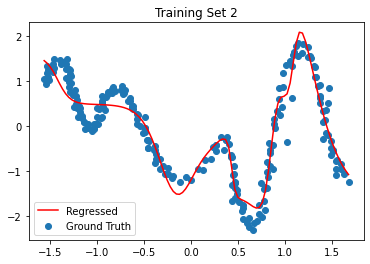

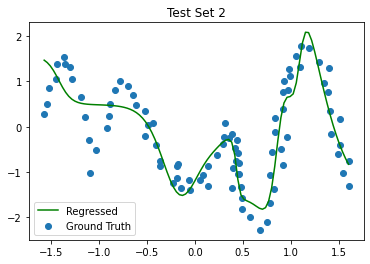

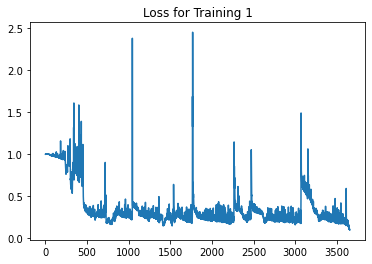

In [15]:
plt.scatter(train2xNor, train2yNor)
result_x = np.linspace(np.min(train2xNor), np.max(train2xNor), 100)[:,np.newaxis]
result_y = model.forward(result_x)
plt.plot(result_x, result_y, color='red')
plt.legend(['Regressed','Ground Truth'])
plt.title('Training Set 2')
plt.show()

#test
plt.scatter(test2xNor, test2yNor)

result_x = np.linspace(np.min(test2xNor), np.max(test2xNor), 100)[:,np.newaxis]
result_y = model.forward(result_x)
plt.plot(result_x, result_y, color = 'green')
plt.legend(['Regressed','Ground Truth'])
plt.title('Test Set 2')
plt.show()

plt.plot(hist['train_loss'])
plt.title('Loss for Training 1')
plt.show()


In [16]:
result_y = model.forward(train2xNor)
print('mean', np.mean((result_y - train2yNor)**2))
print('std', np.std((result_y - train2yNor)**2))

result_y = model.forward(test2xNor)
print('mean', np.mean((result_y - test2yNor)**2))
print('std', np.std((result_y - test2yNor)**2))

mean 0.09812975624831356
std 0.15022242627242416
mean 0.2537094229785395
std 0.37927116373775915


In [22]:
hiddenOuts = list()
for sample in train2xNor:
    model.forward(sample[:,np.newaxis])
    hiddenOuts.append(model.layers[0].activation.xCache[0,:])
hiddenOuts = np.asarray(hiddenOuts)
hiddenOuts.shape

(229, 16)

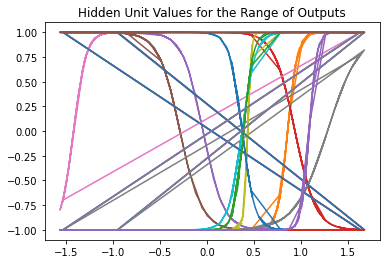

In [23]:
for i in range(hiddenOuts.shape[1]):
    plt.plot(train2xNor, hiddenOuts[:,i])
plt.title('Hidden Unit Values for the Range of Outputs')
plt.show()